In [3]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
import pandas as pd
import cv2

In [47]:
x_data=[]
for i in os.listdir(r"C:\Users\Rizul Bansal\rock"):
    img1=Image.open(r"C:/Users/Rizul Bansal/rock"+"/" + i ).convert('L')
    arr1=np.array(img1)
    x_data.append(arr1)                

In [48]:

for i in os.listdir(r"C:\Users\Rizul Bansal\paper"):
    img1=Image.open(r"C:/Users/Rizul Bansal/paper"+"/" + i ).convert('L')
    
    arr1=np.array(img1)
    x_data.append(arr1)                

In [49]:

for i in os.listdir(r"C:\Users\Rizul Bansal\scissors"):
    img1=Image.open(r"C:/Users/Rizul Bansal/scissors"+"/" + i ).convert('L')
    
    arr1=np.array(img1)
    
    x_data.append(arr1)                

In [50]:
x_data=np.array(x_data)

In [51]:
x_data.shape

(2188, 200, 300)

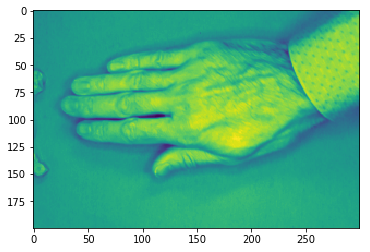

In [53]:
plt.imshow(x_data[1000,:,:])

In [54]:
y_data=[]
for i in range(0,726):
    y_data.append(0)
for i in range(0,712):
    y_data.append(1)
for i in range(0,750):
    y_data.append(2)

In [55]:
y_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [56]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [57]:
y_data.shape

(2188, 3)

In [62]:
x_data = x_data.reshape((2188, 200, 300, 1))



In [58]:
x_data=x_data/255

In [59]:
from keras import layers
from keras import models

In [60]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(200, 300,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [63]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_data, y_data, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
2188/2188 [==============================] - 33s 15ms/step - loss: 1.1214 - acc: 0.3711
Epoch 2/5
2188/2188 [==============================] - 32s 14ms/step - loss: 1.0052 - acc: 0.5361
Epoch 3/5
2188/2188 [==============================] - 31s 14ms/step - loss: 0.5649 - acc: 0.7971
Epoch 4/5
2188/2188 [==============================] - 31s 14ms/step - loss: 0.3834 - acc: 0.8638
Epoch 5/5
2188/2188 [==============================] - 32s 15ms/step - loss: 0.2735 - acc: 0.9027


In [86]:
q=Image.open("WIN_20190929_05_12_10_Pro.jpg").convert('L')

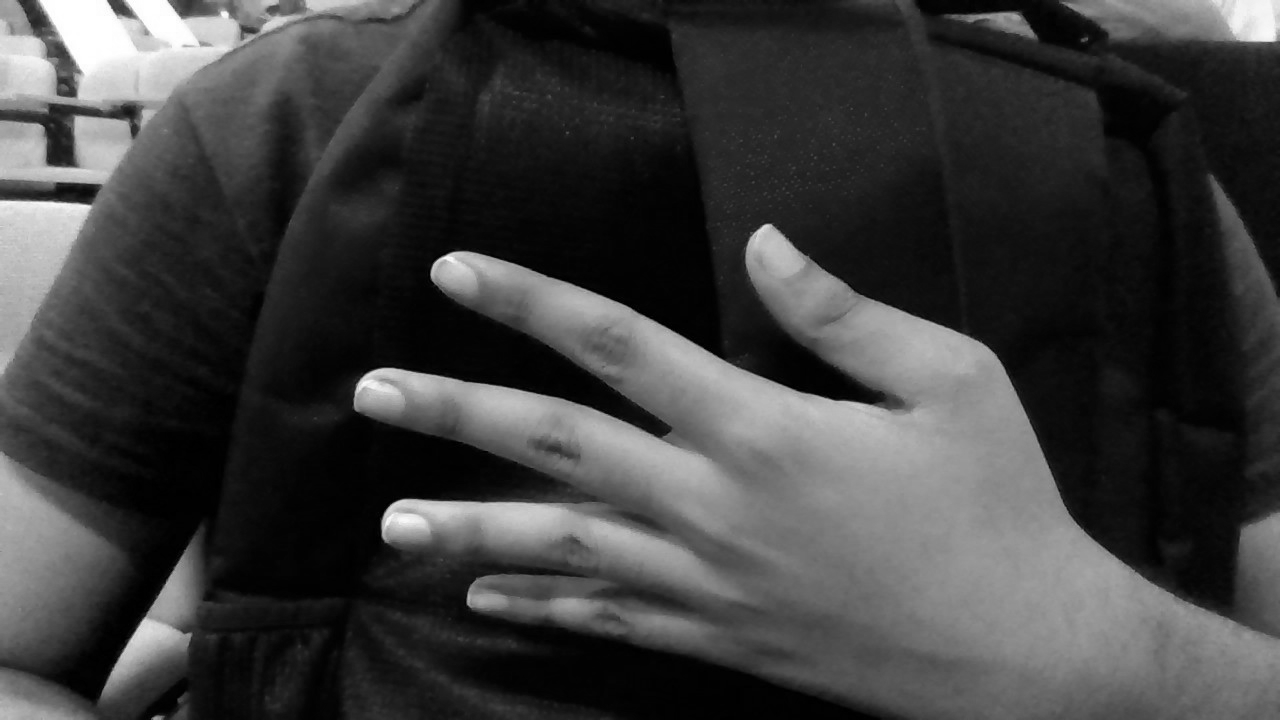

In [87]:
q

In [88]:
q=np.array(q)
print(q)

[[156 155 156 ... 224 225 224]
 [158 158 158 ... 224 226 226]
 [159 157 159 ... 224 225 226]
 ...
 [182 182 181 ...  97  97  98]
 [181 180 179 ...  97  97  97]
 [180 179 179 ...  98  96  98]]


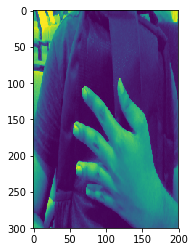

In [89]:
import cv2
q=cv2.resize(q,(200,300))
q.shape
plt.imshow(q[:,:])


In [90]:
q=q.reshape(1,200,300,1)
q

array([[[[160],
         [167],
         [136],
         ...,
         [ 33],
         [ 32],
         [ 30]],

        [[ 26],
         [ 21],
         [ 20],
         ...,
         [244],
         [243],
         [227]],

        [[157],
         [159],
         [160],
         ...,
         [ 24],
         [ 23],
         [ 30]],

        ...,

        [[  2],
         [  2],
         [  1],
         ...,
         [ 96],
         [102],
         [ 95]],

        [[185],
         [180],
         [175],
         ...,
         [  6],
         [  5],
         [  3]],

        [[  2],
         [  3],
         [  2],
         ...,
         [ 99],
         [ 96],
         [ 97]]]], dtype=uint8)

In [91]:
q=q/255

In [92]:
q

array([[[[0.62745098],
         [0.65490196],
         [0.53333333],
         ...,
         [0.12941176],
         [0.1254902 ],
         [0.11764706]],

        [[0.10196078],
         [0.08235294],
         [0.07843137],
         ...,
         [0.95686275],
         [0.95294118],
         [0.89019608]],

        [[0.61568627],
         [0.62352941],
         [0.62745098],
         ...,
         [0.09411765],
         [0.09019608],
         [0.11764706]],

        ...,

        [[0.00784314],
         [0.00784314],
         [0.00392157],
         ...,
         [0.37647059],
         [0.4       ],
         [0.37254902]],

        [[0.7254902 ],
         [0.70588235],
         [0.68627451],
         ...,
         [0.02352941],
         [0.01960784],
         [0.01176471]],

        [[0.00784314],
         [0.01176471],
         [0.00784314],
         ...,
         [0.38823529],
         [0.37647059],
         [0.38039216]]]])

In [93]:
p=model.predict(q)

In [94]:
p

array([[0.14680515, 0.8057419 , 0.04745295]], dtype=float32)

In [83]:
np.argmax(p)

2

In [85]:
from keras.models import load_model
model.save('rpsnew.h5')